# Data analysis and final project report

In this piece of code, we detail the final project, read in the cleaned data, and conduct our analysis.

## Introduction and background

In this project, I studied how earnings of public employees at institutions of higher education in Washington and California vary across different positions, institutions, states, and time. This dataset contained almost 5 million employee-year entries for 2010-2018, of which about 20% were in Washington state, and 80% were in California.

I believe this topic is interesting and relevant because many public employees' salaries are funded by taxpayers. Per the [Washington State Fiscal Information site](http://fiscal.wa.gov/supporta.aspx), "state revenue and expenditure data will be made as open, transparent, and publicly accessible as is feasible with the goal of making government more accountable". The public nature of the data is meant to encourage transparency and accountability in government spending, and ensure that public funds are being spent responsibly. This information has been used to uncover [cases of disproportionately high public employee salaries](https://latimesblogs.latimes.com/lanow/2010/07/bell-city-manager-might-highest-paid-in-nation-787637-a-year.html), to the backlash of the public. 

Other major beneficiaries of this analysis are public employees, as they will be able to compare their earnings to those of employees in similar capacities at their institution and other institutions. In addition, this information can be used by state and university fiscal planning departments to inform standards of fair pay across institutions. [One report](https://hechingerreport.org/increasingly-skeptical-students-employees-want-colleges-to-show-them-the-money/) I found states that for some Colorado community colleges, "there are almost four times more part-time than full-time faculty members but part-timers collectively get about one-tenth of the money the colleges spend on instruction", and that, "at the University of Michigan, lecturers and graduate students negotiating for higher salaries and benefits have been drilling into that institution’s operating budget, finding what they say is a 377 million dollar surplus it’s enjoying from their comparatively low-paid labor." 

I also believe it will be useful to identify any disparities and trends in pay between different types of positions and different institutions. [Legal disputes](https://caselaw.findlaw.com/wa-court-of-appeals/1126632.html) have arisen due to differences in pay among similar job classes in different state institutions. I believe this study will reflect on the fairness of employee earnings as reflected by disparities in pay. One known phenomenon is that the highest-paid Washington state employees are [university sports coaches, and are mostly men](https://patch.com/washington/across-wa/washingtons-millionaire-state-employees-are-men-mostly-coaches). 
 

### Human-centered considerations of privacy
My main ethical concern in using this data relates to the use of personally identifiable information, and the sensitive nature of salary data. [Issues of privacy arise](https://www.governing.com/news/state/gov-survey-disclosing-government-employee-salaries-troubles-public-officials.html) around the reporting of this data, because it publishes the names, earnings, and employer agencies of millions of people across the US. To partially mitigate this concern, according to the [Washington state employee salaries dataset FAQ page](http://fiscal.wa.gov/SalaryDataFAQ.pdf), "employee names are withheld for victims of domestic violence and for employees whose jobs require confidentiality". The Washington state employee salary datasets contain individuals' names, which I removed from the data hosted in my repository in order to respect individuals' privacy, and because my analysis will largely not be focused on individual level data. In contrast, the California state employee salary files do not contain names of individuals, though more detailed data from other sources could be merged on to identify individuals in the data. Even though names may be removed, it may still be possible for individuals to be identified within the dataset, as some combinations of job titles and institutions may be unique entries (for example, there can only be one President of the University of Washington in a given time period). It may also be possible for outliers to become evident throughout the course of this analysis, in cases where some individuals may be earning salaries much higher or lower than the what is typical for their job group or employer agency. While it may be possible to identify unfair practices in this way, the privacy of individuals involved in this analysis may be breached as a result.

## Research questions

My research questions are largely driven by the human-centered concern of fairness. I seek to understand whether salaries are fair in terms of parity in earnings across states, institutions, positions, and time.
My main research questions are:

- Q1: What are the median earnings by institution?
- Q2: What are the median earnings by job type? 
- Q3: Are earnings comparable among job groups between different states, adjusting for relative price levels?
- Q4: Which positions are the most highly paid?


## Methodology and Findings

My first step was to download all the data and clean it, keeping data on employees of higher-education institutions, and compile it for use in my analysis, as detailed in `0_compile_data`. In `1_analyze_data`, I group together employees by job groups, identifying six major types of jobs, and an Unclassified category for job titles which are too ambiguous or specific to classify. Then, I create aggregate metrics (medians, quantiles, ranges) of earnings at the job, agency, and state level. I use the median as the main benchmark throughout the analysis due to large amounts of noise at the lower tail of the earnings distributions. I use BLS state price parities data to adjust the salaries to account for differing price levels among states, to understand whether higher median earnings in California are driven by higher price levels. I proceed to analyze the data through data mining techniques and visualization, seeking to answer the main research questions.

First, we will import all the necessary packages we will work with, and read in the cleaned earnings data.

In [1]:
rm(list = ls())
require(data.table)
require(ggplot2)
library(grid)
library(gridExtra)
library(scales)
library(repr)
options(warn=-1)

sal <- fread("../data_clean/edu_salaries.csv")

Loading required package: data.table

Loading required package: ggplot2



Now, I explore research question Q1: What is the median earnings by institution?

From the below table, we see some surprising results: two of the top 5 highest-earning agencies are California community colleges, University of Washington is in second position, and University of California comes in fourth by a large margin. On the other hand, the lowest-earning agencies are community colleges with only a few thousand dollars.

There are a few explanations I can see for some of these results. For example, as we have described and will see in the following analyses, student employee data is more complete for California agencies, and students make up a large proportion of employees, thus the median earnings for California universities tend to be much lower than those of Washington universities. For colleges with very low median earnings, the number of employees is relatively small, and the earnings distributions are very left-skewed, as we can see from the quantiles.

In [2]:
sal_median <- sal[year == 2018, .(median = median(salary), lower_quantile = quantile(salary, 0.25), upper_quantile = quantile(salary, 0.75), max = max(salary), employees = .N), by = c("year", "employer")]
setorder(sal_median, -median)
sal_median

year,employer,median,lower_quantile,upper_quantile,max,employees
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2018,San Francisco Community College District,52018.5,20691.75,84899.00,354509,2590
2018,University of Washington,44900.0,17000.00,78000.00,3473300,50110
2018,Imperial Community College District,42142.0,14271.00,86606.50,193739,627
2018,University of California,29991.0,4678.00,70639.00,3341707,306007
2018,Spokane Community College,26500.0,8400.00,47500.00,226100,2490
2018,Central Washington University,26000.0,6000.00,53200.00,454700,3060
2018,Eastern Washington University,25950.0,6000.00,54400.00,366800,2954
2018,Western Washington University,25200.0,5600.00,60200.00,374300,4029
2018,Gavilan Joint Community College District,24676.0,9371.00,60699.00,280664,629


The next problem I identify is that there are hundreds of thousands of unique job titles in the dataset, so it will be challenging to classify all job titles into categories. I build a list of over 200 keywords to tag job titles as belonging to several major categories: Teaching staff and Professors (20%), Executives (2%), Medical staff (9%), Athletic departments staff (1%), Student employees (24%), and Administrative staff (29%). About 17% of the data belonged to an Unclassified group of job types.

I used a few different strategies to identify the keywords. First, I identified the most common job titles, and most common titles by employer organization, using code such as `sort(table(sal$title), decreasing=T)[1:50]`. Second, I used a set of job lists and job codes from [University of Washington](https://ap.washington.edu/ahr/academic-titles-ranks/) [and](https://ucnet.universityofcalifornia.edu/system_series/) [University of California](https://www.ucop.edu/academic-personnel-programs/_files/acad-title-codes/academic-titles-sorted-title-name.pdf).
Finally, I reviewed job titles picked up by the keywords in order to minimize incorrect classifications, and reviewed job titles in the Unclassified category to attempt to categorize as many as possible.

The result is the below list of keywords.

In [3]:
prof <- c("ADJUNCT PROF", "ASSISTANT PROF", "ASSOCIATE PROF", "ASSOC PROF", "ADJ PROF", 
          "ASST PROF", "CLIN PROF", "PROF IN RESHCOMP", "PROF OF CLINHCOMP", "PROFHCOMP","INSTRHCOMP", 
          "PROFAY", "TEACHING ASSOCIATE", "FTFTENURE TRACK", "TEACH TNRD SR ASSOCIATE", "PROFESSOR",
          "TEACHING ASSOCIATE", "FACULTY", "TEACHER", "LECTURER", "INSTRUCTOR", "INSTR ","INSTR,", "LECTAY")
non_prof <- c("TEACHING ASSOCIATE", "FACULTY", "TEACHER", "LECTURER", "INSTRUCTOR", "INSTR ","INSTR,", "LECTAY")
student <- c("STDT", "TEACHG ASST", "STUDENT ASSISTANT", "STUDENT WORK", "STUDENT EMPLOYEE", "GRADUATE ", "TUTNON GSHIP",
             "GSR", "GSI", "TUTOR", "TEACHING ASSISTANT", "STUDENT TRAINEE", "INTERN ", "POSTDOC","TUTGSHIP", "STUDENT 2","STUDENT 3","STUDENT 1", "READERGSHIP",
             "GRAD ", "STUDENT HELP", "STUDENT/SHORTTERM", "STUDENT AIDE", "STUDENT HOURLY", "INSTRUCTIONAL ASSISTANT", "STUDENT  NON", 
             "STUDENT ;", "STUDENT ASST", "SSTUDENT ;", "STUDENT/HOURLY STAFF ;", "TEMPORARYSTUDENT SUPPORT")
executive <- c("CEO", "DEAN", "CHAIR", "DIRECTOR", "PRESIDENT", "PROVOST", "CHANCELLOR", "DIR", "VP", "V PROV", "BOARD MEMBER", " VC ")
sports <- c("COACH", "FOOTBALL", "BASKETBALL", "SPORTS", "ATHLETIC TRAINER", "ATH TRAINER")
admin <- c("LIBRAR", "COUNSELOR", "COUNSELING", "STUDENT SERVICE", "PROGRAM ASSISTANT", "SPECIALIST", "COORD", "SUPPORT STAFF", "TUTNON STDNT",
           "PROGRAM OPERATIONS", "RECREATION PRG", "EARLY CHILDHOOD SP", "EARLY CHILD PROG", "SOCIAL WORK", "CHILD CARE","TEMPORARY NON STUDENT",
           "RESEARCH CONSULTANT", "ANALYST", "MAINTENANCE", "SKILLED TRADES WORKER","COLLEGE ASSISTANT", "ASSISTANT TO THE ",
           "ADMINISTRATOR", "ADMIN ", "ADMINISTRATIVE", " IT ", "INFORMATION TECH", "EXEC AS", "ASST TO ", "EXECUTIVE AS", "ADM AS","ADMASST","ASSISTANT TO",
           "INFORMATION SYSTEM", "COMPUT", "PROGRAMMER", "SOFTWARE ENGINEER", "MGR", "MNGR", "MANAGER", "ACCOUNTING","ACCOUNTANT", 
           "FISCAL", "FINANC", "BUDGET", "GRAPHIC DESIGNER","SECURITY GUARD","CAMPUS SECURITY","CAMPUS PATROL", "SECURITY OFFICER","POLICE", "POL OFCR", 
           "CUSTODIA", "JANITOR", "FOOD ", "SERVICE WORKER", "PROGR ANL", "ANL 1","ANL 3", "ANL 2", "ANL 4","ANL 5", "PUBLIC SFTY", "GRANT WRITER",
           "SECRETARY", "PROF STAFF", "OFFICE ASSISTANT", "TEMPORARY STAFF", "TECHNOLOGIST", "FACILITIES", "CASHIER","CUSTOMER SERVICE",
           "DEVELOPMENT SERVICES", "TECHNICAL", "CLERICAL", "ADM COUNS","PATIENT BILLER", "CLERK","GENERAL ASSISTANT","MGT SVC OFCR",
           "COOK", "CATERING", "PROFESSIONAL", "BLANK AST", "GROUNDS", "CLERK SR OR SECR", "ADM CRD OFCR", "MEDIA TECHNICIAN", "MECHANIC",
           "INTRPRTR", "INTERPRETER", "ADVISOR", "CONSULTANT", "CASUAL WORKER", "CASUAL EMPLOYEE", "BUILDING SERVICE", "ELECTRICIAN", "SUPERVISOR",
           "PAINTER", "PART TIME HOURLY STAFF", "INSTR&CLASSROOM SUPT TCH","INSTRUCTION & CLASSROOM SUPPORT TECH ", "USHER", "BILLER",
           "CONTIN ED PT CONTRACT", "SPECIAL CONTRACTS", "PROGRAM SUPPORT", "TEMP HRLY, NON STUDENT", "BOOKSTORE BUYER", "APPLICATIONS PROGR", "APPLICATION DEVELOPER",
           "EDUCATIONAL PLANNER", "CREDENTIALS EVALUATOR", "CHILD DEVELOPMENT CENTER ASSISTANT", "LIFEGUARD", "ADMISSIONS & RECORDS ASSISTANT",
           "AUTO EQUIP OPR", "CAMP CNSLR", "ELECTRN", "RESEARCH ASSOCIATE", "SRA ", "RESEARCH SCIENTIST", "RESEARCH STUDY ASSISTANT","RESEARCH ASSISTANT", 
           "LAB AST", "ASST RESFY", "LECT IN SUMMER SESSION", "MOONLIGHT APPOINTMENT", "MOONLIGHT INSTRUCTION", "INSTRUCTIONAL AIDE", "INSTRUCTIONAL ASST", 
           "PARTTIME INSTRUCTION", "CLASSIFIED S/T TEMP, SUB", "STDT AFFAIRS OFCR", "STDT DISABILITY SPEC", "STDT ACAD SPEC", "CUSTOMER SVC")  
medical <- c("NURSE ", " RESIDENT ", "RESID PHYS", "PHYSCN", "HOSP BLANK", "PATIENT SERVICES", "PATIENT CARE", "HOSPITAL ASSISTANT", "SENIOR FELLOW","FELLOW ACGME", 
             "MEDICAL ASSISTANT", "CLINICAL ASSISTANT", "PHARMAC", "RESPIRATORY CARE PRACTITIONER", "CLINICAL TECHNOLOGIST", "BLDG MAINT WORKER",
             "MEDICAL LABORATORY", "IMAGING TECHNOLOGIST", "PRECEPTOR", "SRA 2 NEX", "CLIN LAB SCI", "CLIN RSCH CRD", "MED AST ", 
             "HOSP LAB", "POSTMD", "REG RESP THER", "MED OFC SVC CRD", "DENTIST", "HOSP UNIT", "CLIN CARE PARTNER", "PHLEBOTOMIST", "HOSP AST SR",
             "SURGICAL TCHN", "STERILE PROCESSING TCHN", "RADLG TCHNO SR", "DENTAL HYGIENE")

profl = paste(prof, collapse="|")
non_profl = paste(non_prof, collapse="|")
studentl = paste(student, collapse="|")
executivel = paste(executive, collapse="|")
sportsl = paste(sports, collapse="|")
adminl = paste(admin, collapse="|")
medicall = paste(medical, collapse="|")

Now, we perform the keyword search to assign the job types, and make a few manual assignments.

In [4]:
# Perform keyword search
sal[grepl(medicall, title), `Job type` := "Medical"]
sal[grepl(studentl, title), `Job type` := "Student"]
sal[grepl(profl, title), `Job type` := "Teaching"]
sal[grepl(executivel, title), `Job type` := "Executive"]
sal[grepl(adminl, title), `Job type` := "Administrative"]
sal[grepl(sportsl, title), `Job type` := "Athletics"]
sal[is.na(`Job type`), `Job type` := "Unclassified"]

# Manual fixes
sal[title %in% c("VP, ADMIN SERVICES", "VP OF ADMINISTRATIVE SVCS", "VP ADMIN/FINANCE", "VP STUDENT SERVICES", 
                 "VP, ADMINISTRATIVE SERVICE", "VP ADMINISTRATIVE SVC", "VPSTUDENT SERVICES", "VP FINANCIAL SERVICES",
                 "VP OF STUDENT SERVICES", "VP ADMINISTRATIVE SERVICES", "VP OF INSTR ", "VP TECHNOLOGY & FISCAL SRV",
                 "VP ADMINISTRATIVE SRVS", "VP BUSINESS &FINANCIAL AFFAIRS", "VP FOR FINANCE"), `Job type` := "Executive"]
sal[grepl("HOSPITALASSOCIATE", title), `Job type` := "Medical"]
sal[grepl(executivel, title) & `Job type`=="Administrative" & !grepl("ADMIN", title) & !grepl("EXEC AS", title) & 
      !grepl("ADM AS", title) & !grepl("ADMASST", title) & !grepl("ASST TO ", title) & 
      !grepl("ASSISTANT TO", title) & !grepl("EXECUTIVE AS", title) & !grepl("LIFEGUARD", title) & 
      !grepl("TEMPORARY AS", title) & !grepl("AST TO", title), `Job type` := "Executive"]
sal[grepl("OFFICE OF THE VP", title) | grepl("PRESIDENTS OFFICE", title) | grepl("OFFICE OF THE CHANCELLOR", title), `Job type` := "Administrative"]
sal[grepl(profl, title) & `Job type`=="Administrative" & !grepl("ADMIN", title), `Job type` := "Teaching"]
sal[title == "FELLOW", `Job type` := "Medical"]
sal[grepl("PRODUCER DIR|RSDT DIR", title), `Job type` := "Administrative"]
sal[grepl("ENGINEER", title) & `Job type`=="Unclassified", `Job type` := "Administrative"]

Now, we sum up total number of employees and total employee earnings, by year, employer agency, and job type. Using this data, we can visualize the earnings and number of employees by job type.

In [5]:
# Group all agencies
sal[grepl("College", employer), employer := " Colleges"]
sal[, employer := paste0(state, " - ", employer)]


# Calculate total employees and earnings by agency, year, and job type
sal_jobs <- sal[, .(tot = .N), by = c("year", "employer", "Job type")]
sal_totals <- sal[, .(tot = sum(salary)), by = c("year", "employer", "Job type")]

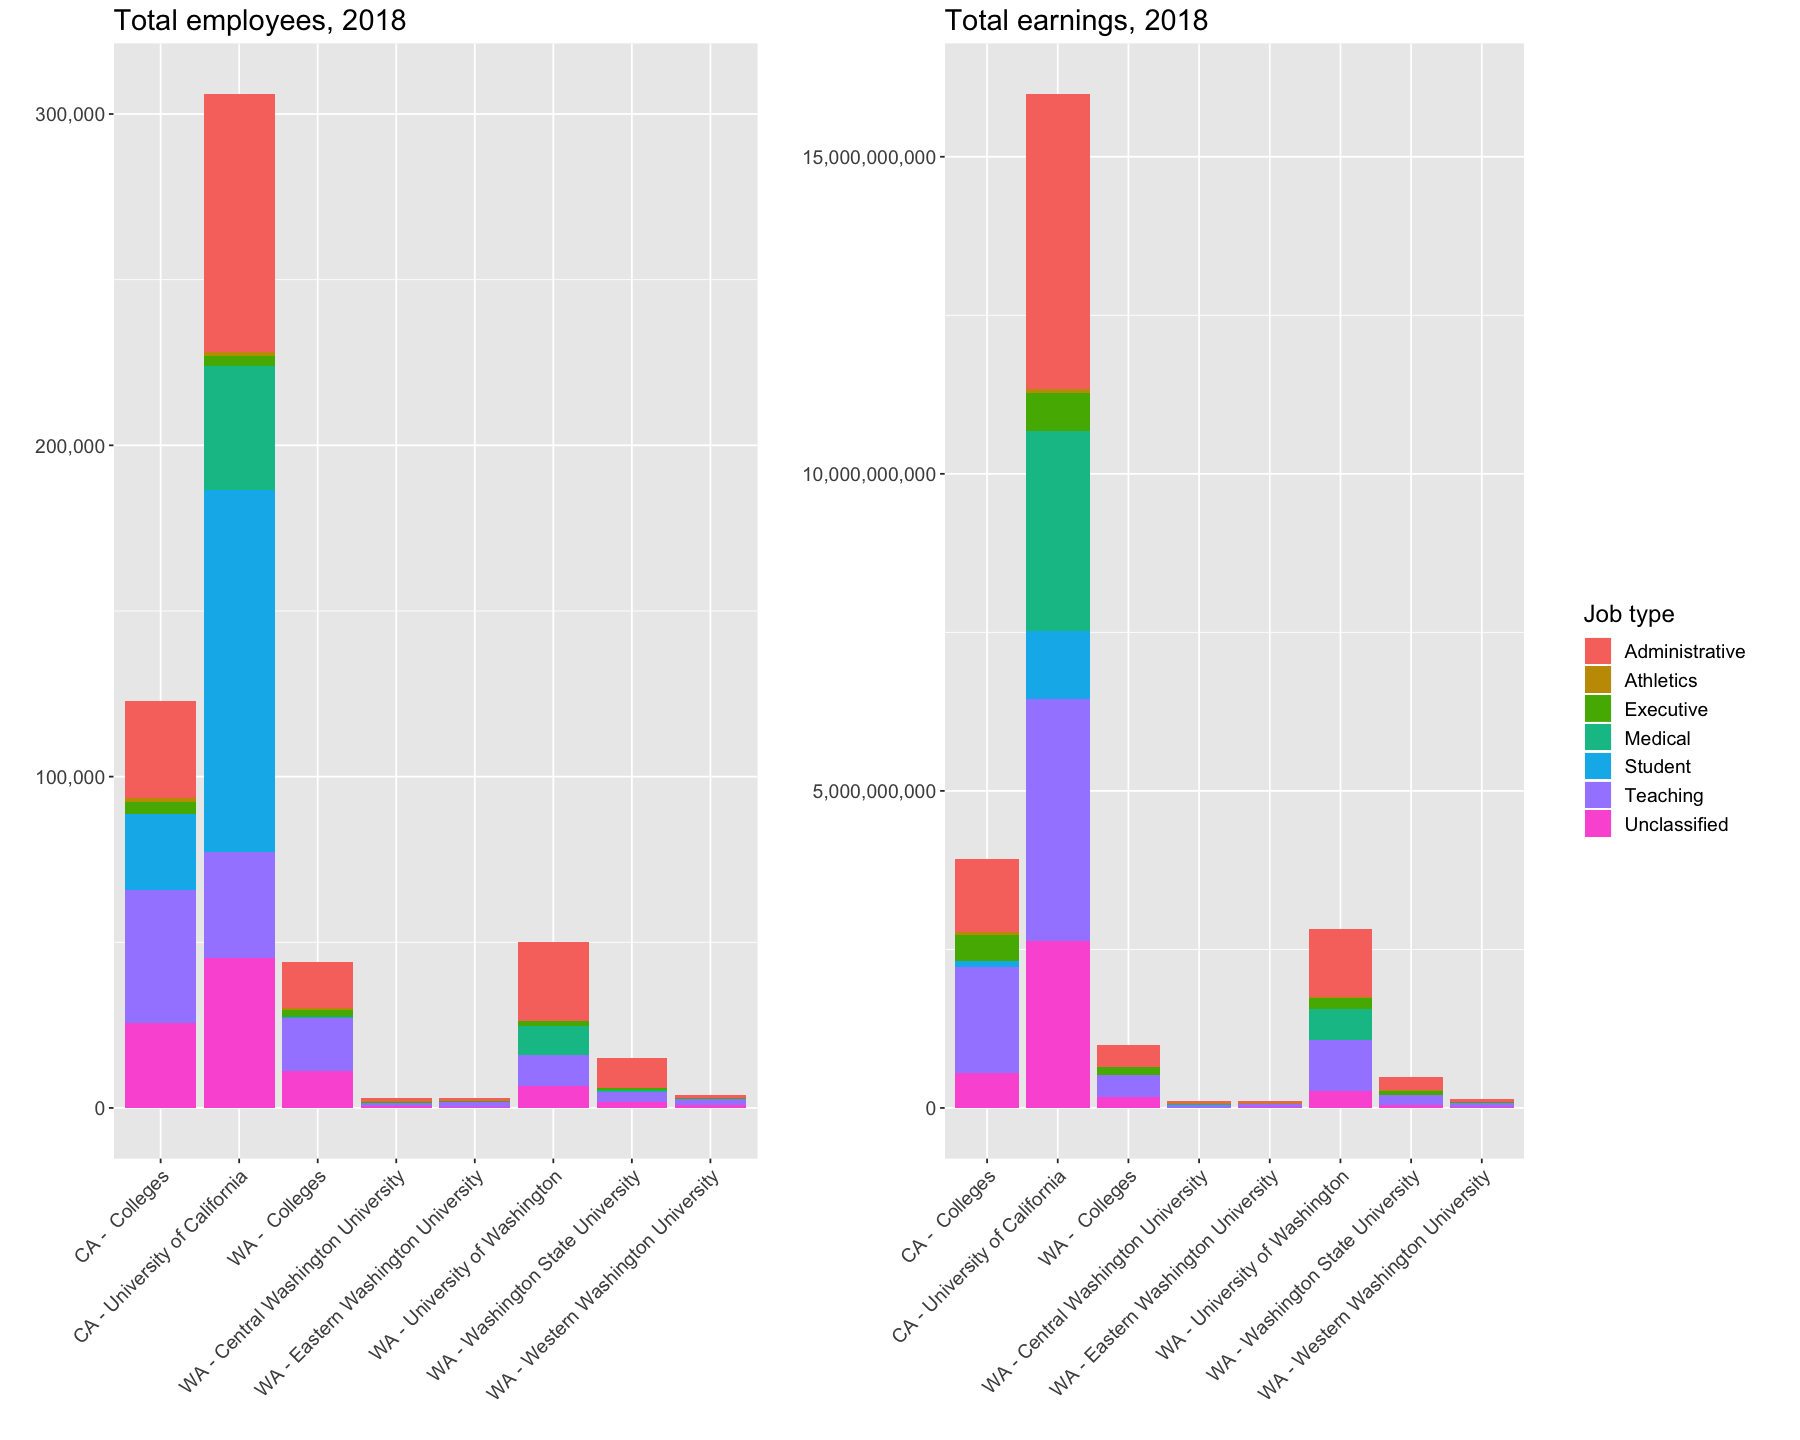

In [6]:
options(repr.plot.width=15, repr.plot.height=12)

# Plots of 2018 employees and earnings, in level and proportion space
get_legend <- function(myggplot){ # source: http://www.sthda.com/english/wiki/wiki.php?id_contents=7930
  tmp <- ggplot_gtable(ggplot_build(myggplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)
} 
                      
stacked_bars <- function(pct = T, job_earn = T, leg = F) {
  if(leg) {
    legs <- theme()
  } else {
    legs <- theme(legend.position="none")
  }
  if(pct) {
    pos <- "fill"
    yvv <- ""
    sc <- scale_y_continuous()
    if(job_earn) {
      dt <- copy(sal_totals)[year == 2018]
      tt <- "Proportion of total earnings, 2018"
    } else {
      dt <- copy(sal_jobs)[year == 2018]
      tt <- "Proportion of total employees, 2018"
    }
  } else {
    pos <- "stack"
    sc <- scale_y_continuous(label=comma)
    if(job_earn) {
      dt <- copy(sal_totals)[year == 2018]
      tt <- "Total earnings, 2018"
      yvv <- ""
    } else {
      dt <- copy(sal_jobs)[year == 2018]
      yvv <- ""
      tt <- "Total employees, 2018"
    }
  }
  ggplot(dt, aes(x = employer, y = tot, fill = `Job type`)) + 
    geom_bar(stat = 'identity', position = pos) + sc +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) + xlab("") + 
    ylab(paste(yvv)) + ggtitle(paste(tt)) + legs + theme(text = element_text(size=14.5)) + labs(fill = "Job type")
}
legend <- get_legend(stacked_bars(leg = T))
                      
grid.arrange(stacked_bars(pct = F, job_earn = F), stacked_bars(pct = F), legend, nrow = 1, widths=c(2.3, 2.3, 0.8))

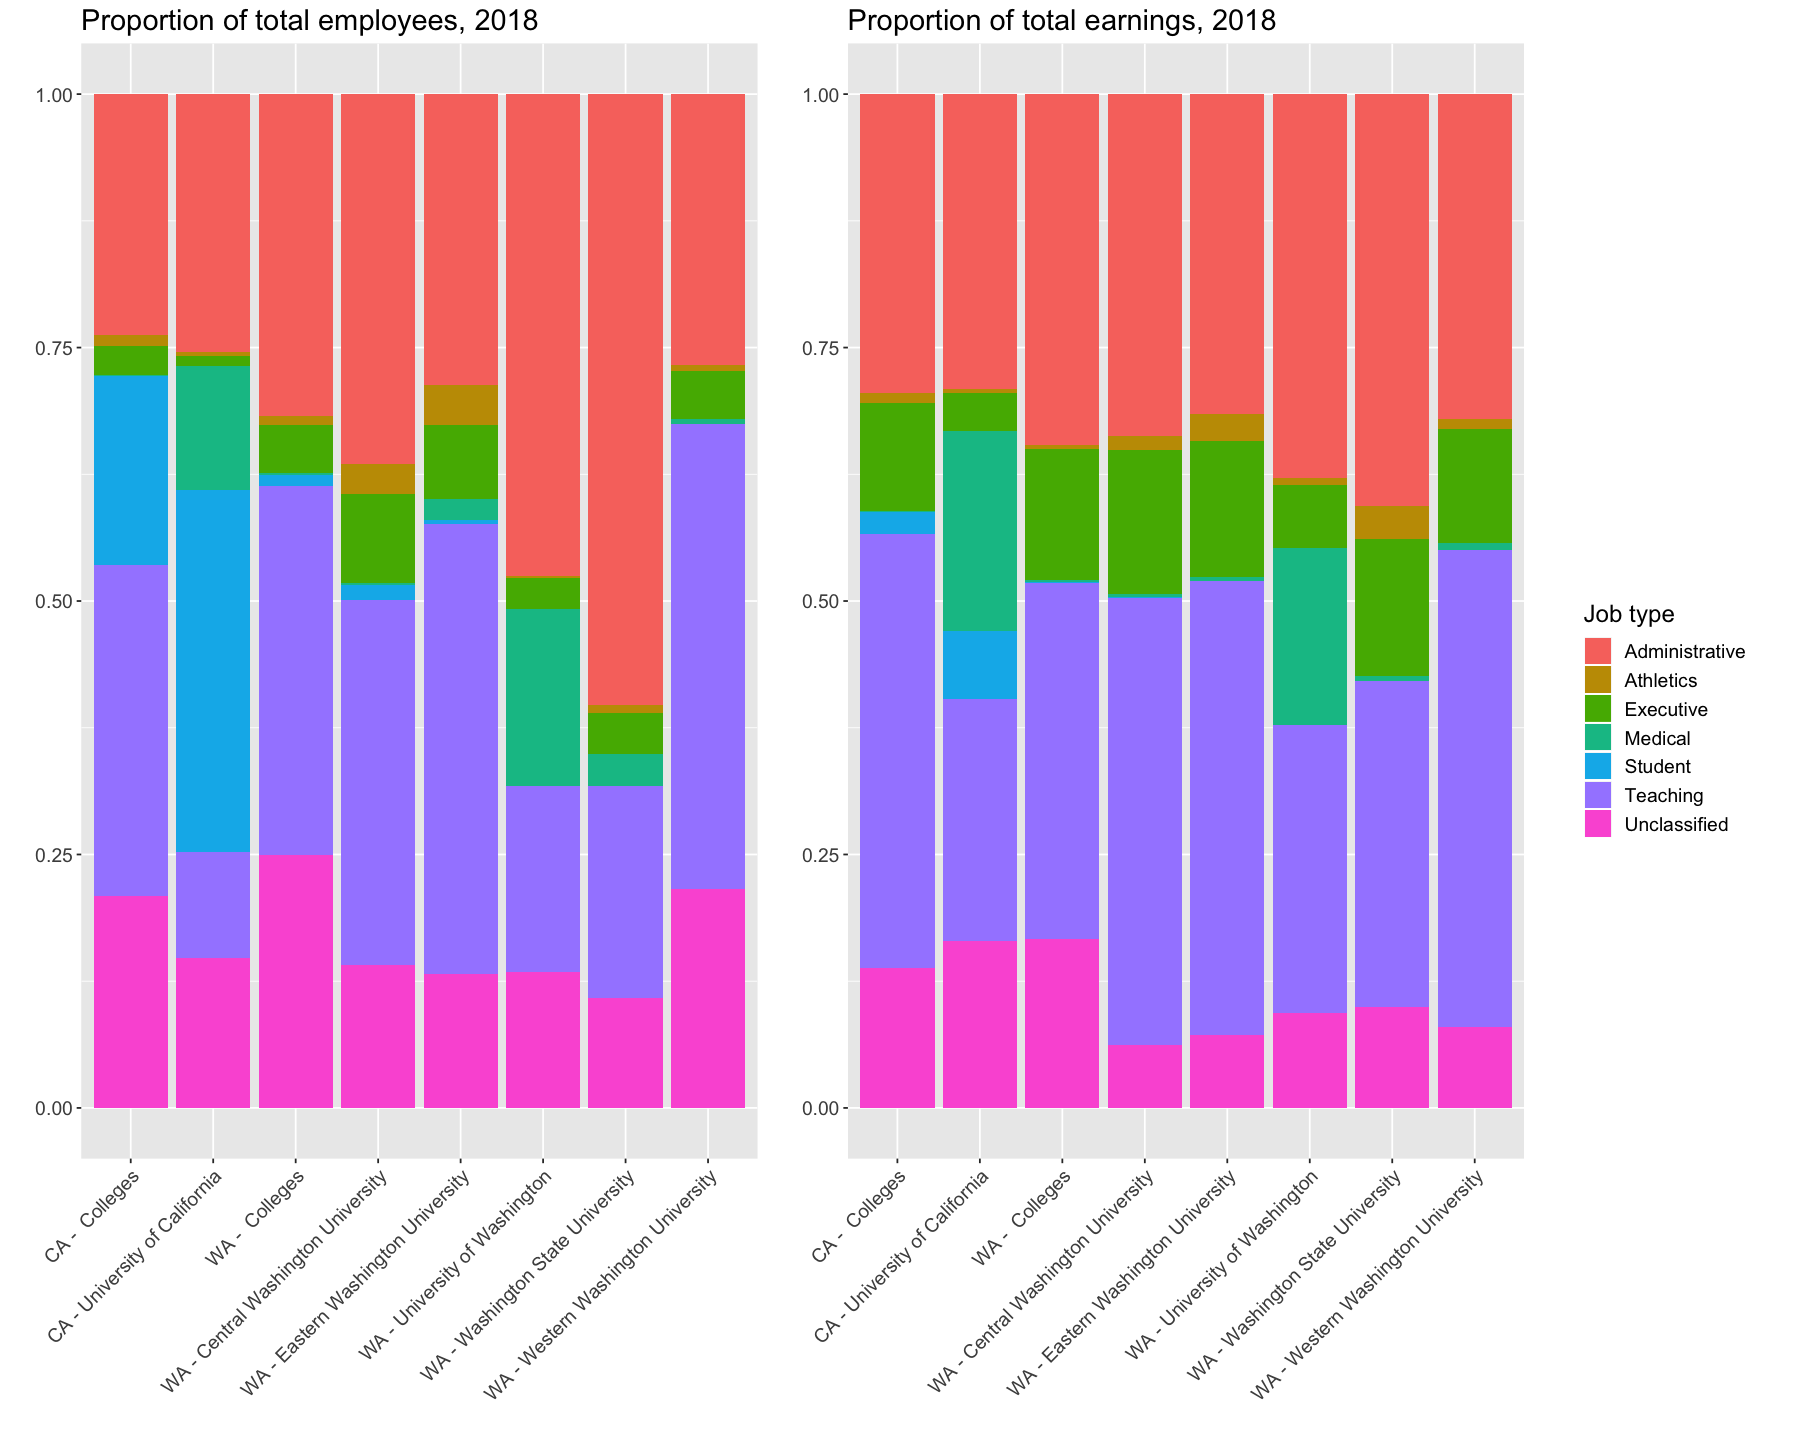

In [7]:
grid.arrange(stacked_bars(job_earn = F), stacked_bars(), legend, nrow = 1, widths=c(2.3, 2.3, 0.8))

The first set of figures show that University of California is by far the largest school with over 300,000 employees, and over 15 billion dollars in disbursements on employee earnings. The University of Washington has about 50,000 employees and over 2.5 billion dollars in employee earnings. Note the large proportion of California employees that are students, and the significant portion of medical staff at schools with a large focus on medical programs, such as UW and UC.

From the second set of figures, we begin to see disparities in the proportion of earnings across institutions and relative to proportion of employees. While students make up a large prportion of California employees, they have a relatively small total earnings. On the other hand, executives make up a small proportion of employees, but a larger proportion of salaries earned. Comparing Central and Eastern Washington universities, Central's teaching staff make up a smaller proportion of total employees than at Eastern, but as a proportion of total earnings, the teaching staff make up a similar proportion of total earnings across the two universities, implying that teaching staff at Central are better paid relative to the number of teaching staff.

Next, we explore research questions Q2: What are the median earnings by job type? and Q3: Are earnings comparable among job groups between different states, adjusting for relative price levels?

In this first step, we visualize the earnings distributions of the 2018 data by state. We see that Executives have the highest earnings, followed by Professors, and Student employees have the lowest earnings. 

Another interesting trend we observe is that California employees have substantially higher median earnings over Washington employees, across all job types.

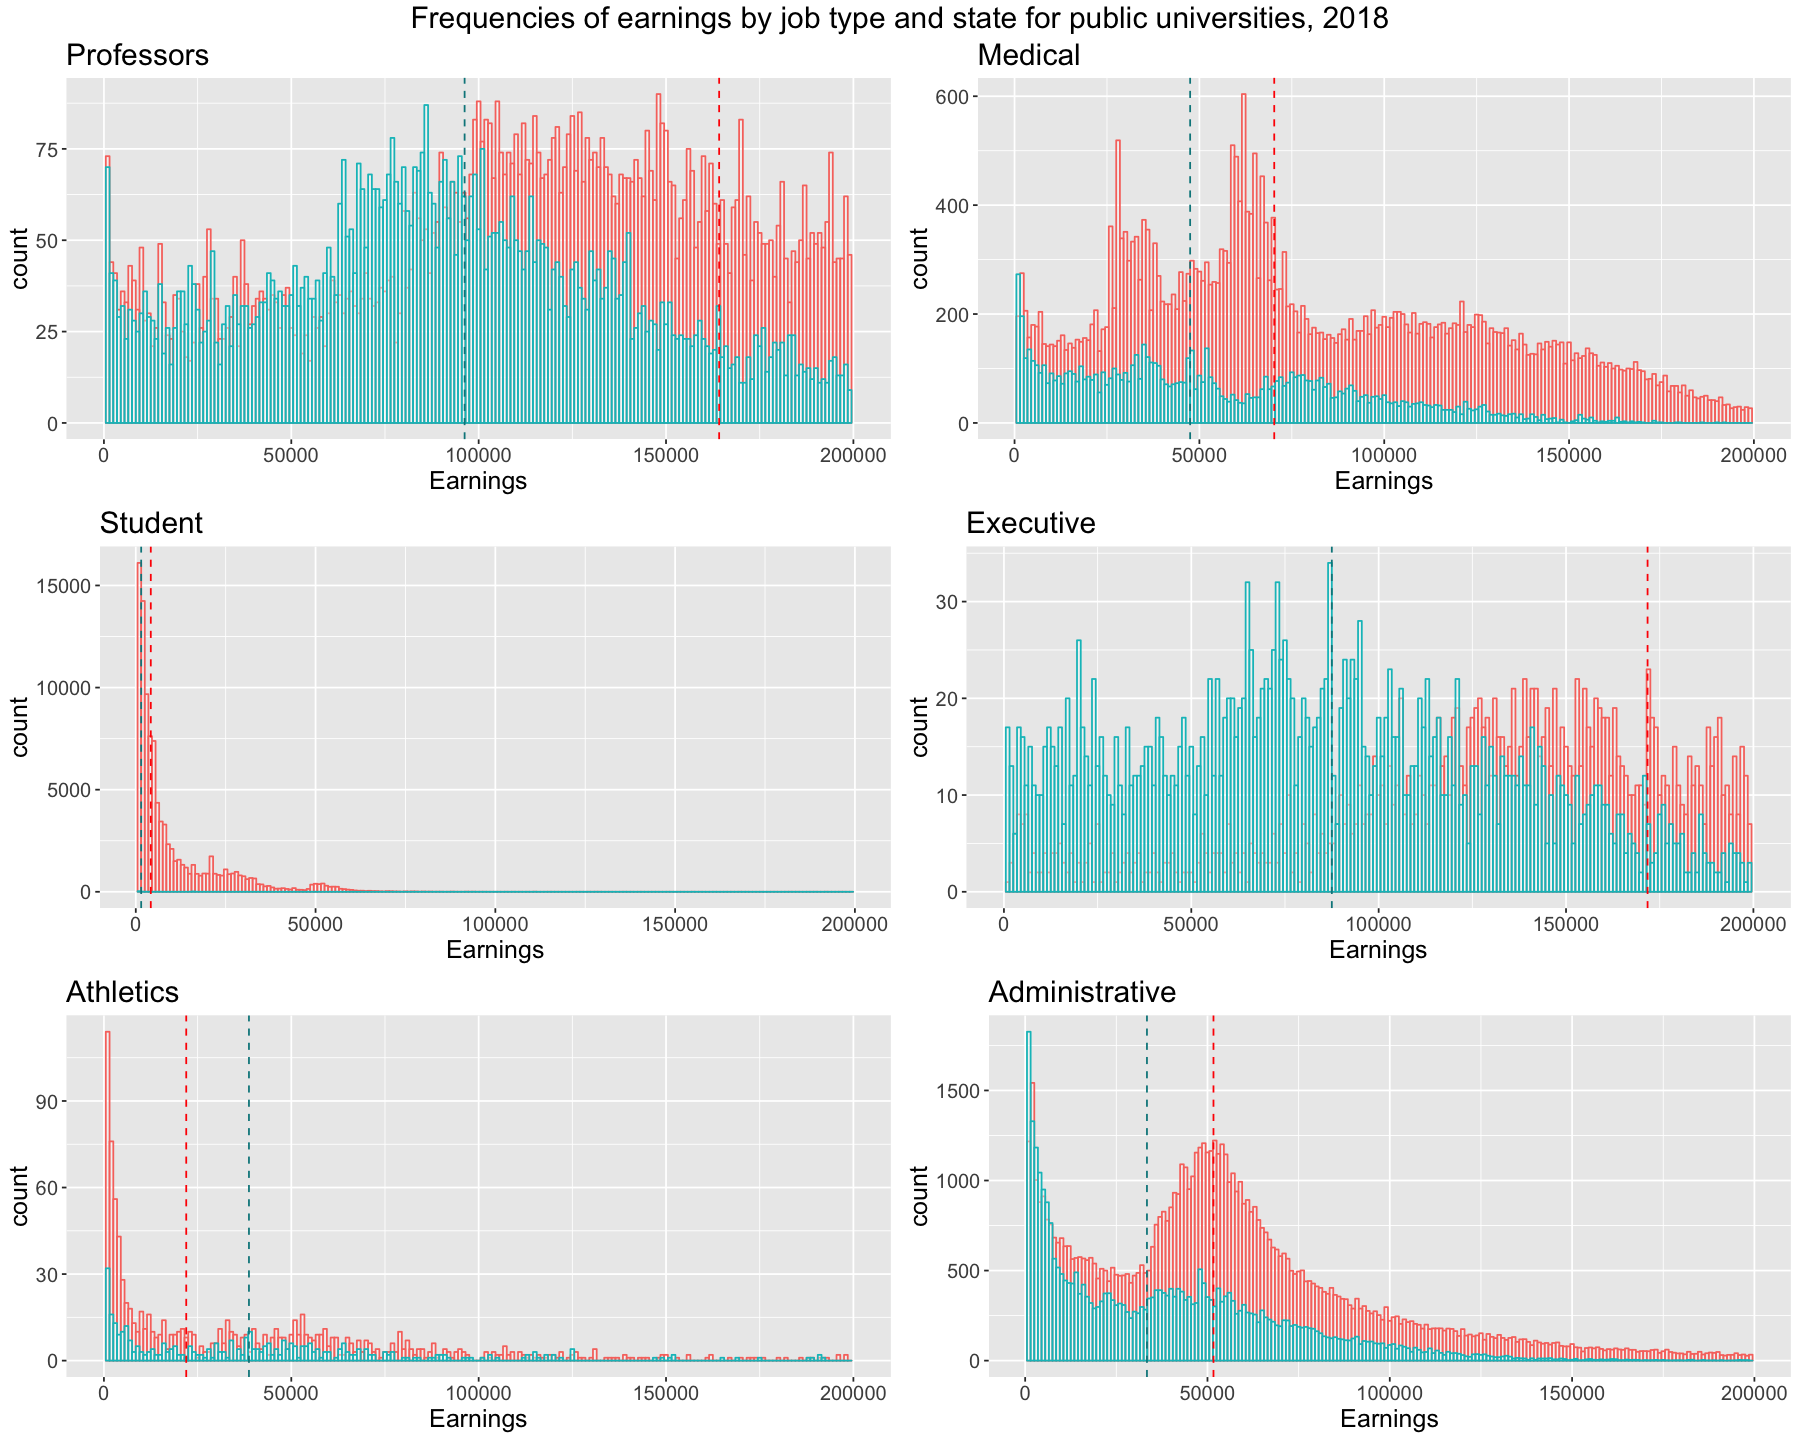

In [8]:
sal[`Job type` == "Teaching" & grepl(non_profl, title), `Job type` := "Unclassified"]
sal[`Job type` == "Teaching", `Job type` := "Professors"]

histograms <- function(type) {
  ggplot(data = sal[year==2018 & `Job type` == paste0(type) & grepl("University", employer)]) + ggtitle(paste0(type)) + theme(text = element_text(size=15)) +
    geom_histogram(aes(x=salary, color = state), binwidth = 1000, fill = "white", alpha=0.4, position="identity") + xlim(0, 200000) + xlab("Earnings") +
    geom_vline(aes(xintercept=median(sal[year==2018 & `Job type` == paste0(type) & grepl("University", employer) & state == "WA"]$salary)), linetype = "dashed", color = "turquoise4") +
    geom_vline(aes(xintercept=median(sal[year==2018 & `Job type` == paste0(type) & grepl("University", employer) & state == "CA"]$salary)), linetype = "dashed", color = "red")
}

grid.arrange(histograms("Professors"), histograms("Medical"),histograms("Student"),
             histograms("Executive"),histograms("Athletics"),histograms("Administrative"), nrow = 3, 
             top = textGrob("Frequencies of earnings by job type and state for public universities, 2018", 
             gp=gpar(fontsize=18)))

To evaluate the second part of Q3, we apply the BLS state price level adjustment factors, and see that the higher median earnings for California employees persist even when adjusting for relative price levels.

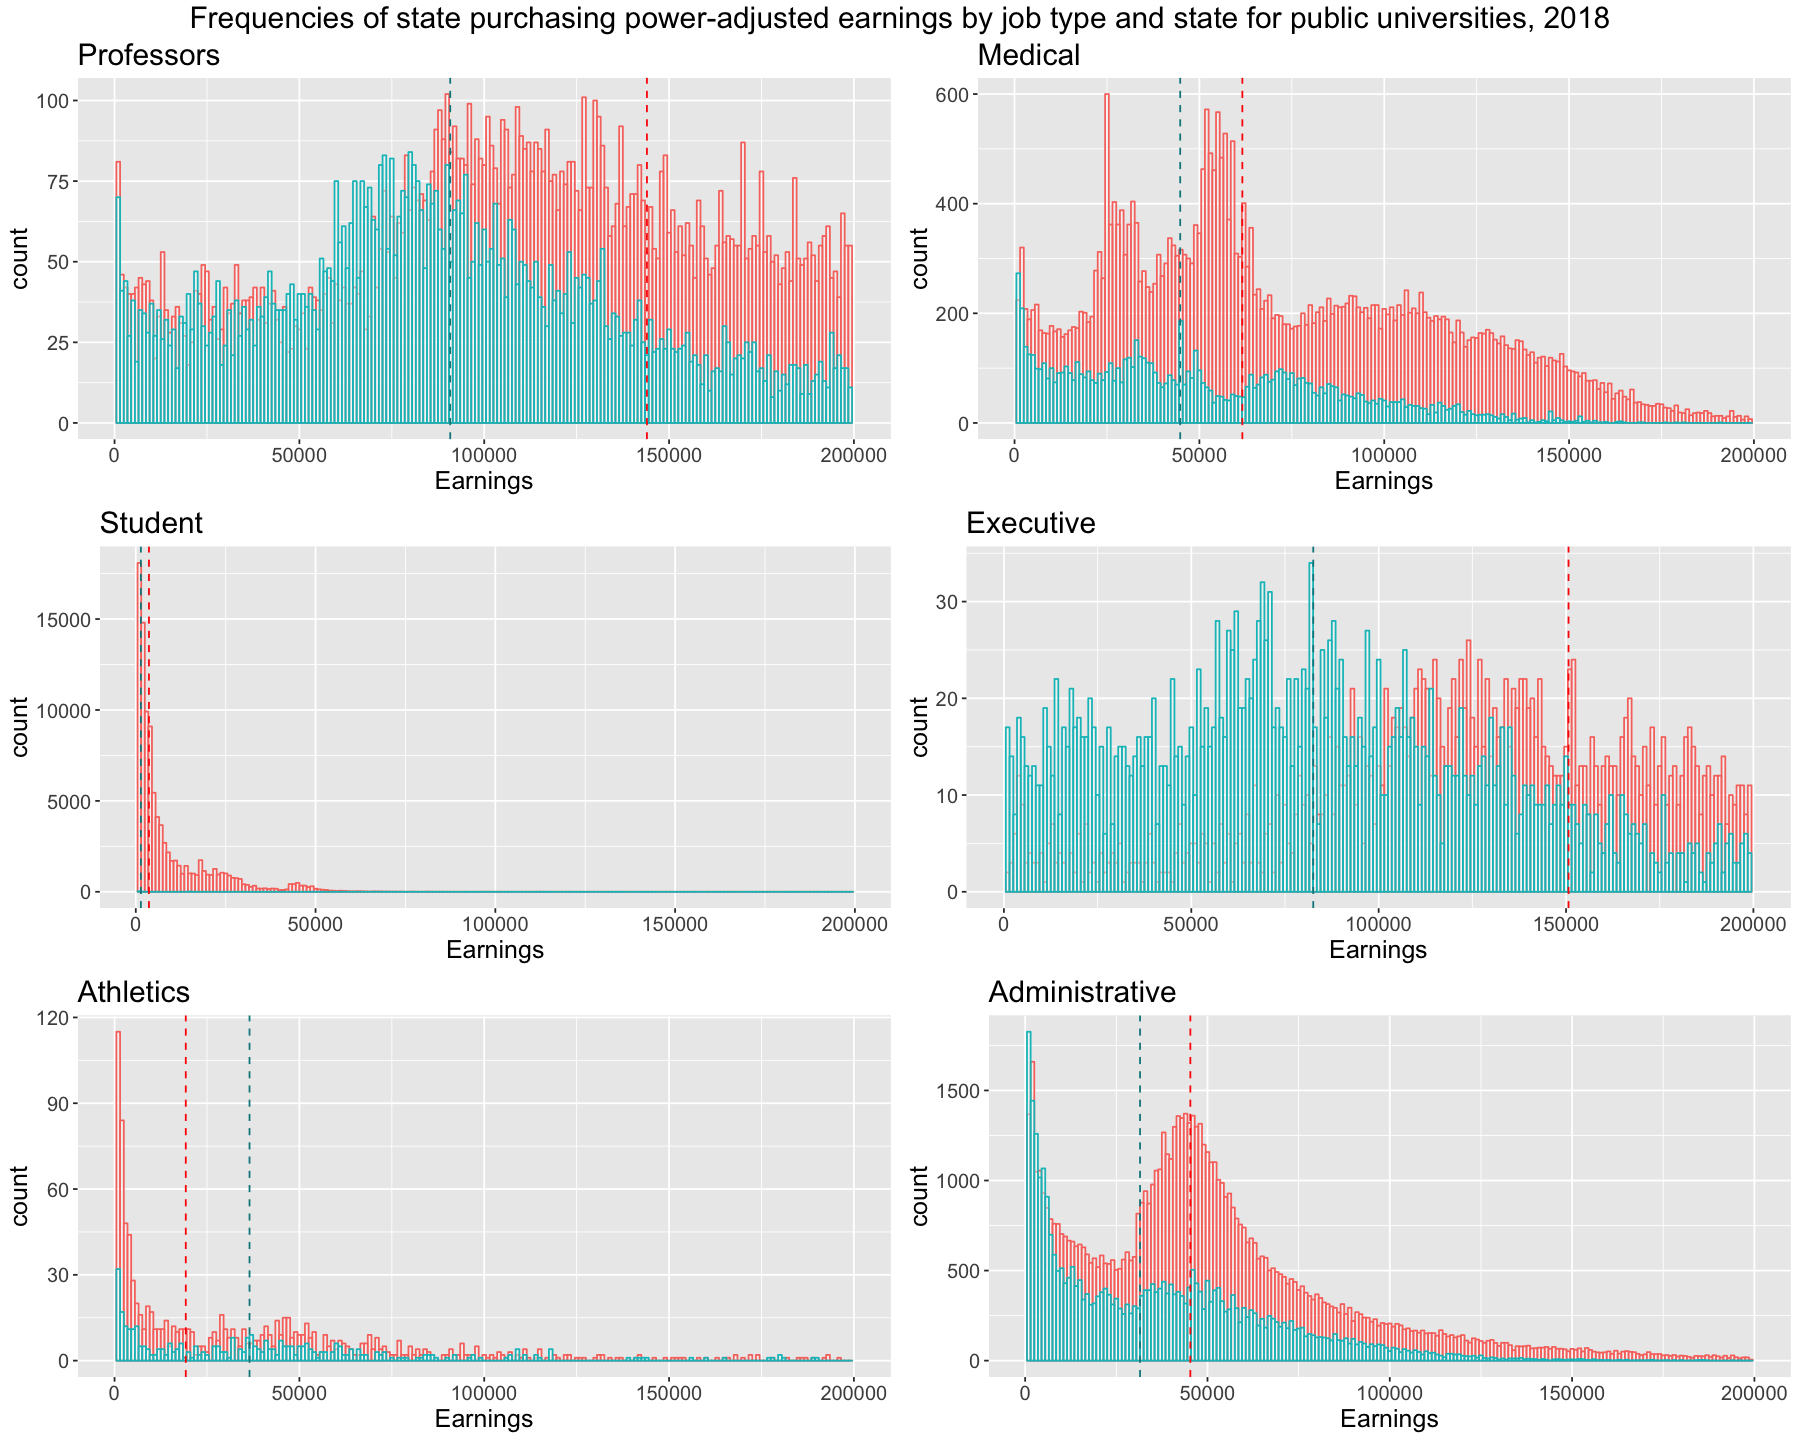

In [9]:
# Bring in purchasing power parity data by state, and adjust state earnings data
ppp <- fread("../data_clean/state_ppp.csv")
sal2 <- merge(sal, ppp, by = c("state", "year"))
sal2[, salary := salary / adj]

histograms <- function(type) {
  ggplot(data = sal2[year==2018 & `Job type` == paste0(type) & grepl("University", employer)]) + ggtitle(paste0(type)) + theme(text = element_text(size=15)) +
    geom_histogram(aes(x=salary, color = state), binwidth = 1000, fill = "white", alpha=0.4, position="identity") + xlim(0, 200000) + xlab("Earnings") +
    geom_vline(aes(xintercept=median(sal2[year==2018 & `Job type` == paste0(type) & grepl("University", employer) & state == "WA"]$salary)), linetype = "dashed", color = "turquoise4") +
    geom_vline(aes(xintercept=median(sal2[year==2018 & `Job type` == paste0(type) & grepl("University", employer) & state == "CA"]$salary)), linetype = "dashed", color = "red")
}

grid.arrange(histograms("Professors"), histograms("Medical"),histograms("Student"),
             histograms("Executive"),histograms("Athletics"),histograms("Administrative"), nrow = 3, 
             top = textGrob("Frequencies of state purchasing power-adjusted earnings by job type and state for public universities, 2018", gp=gpar(fontsize=18)))

Finally, we look at Q4: Which positions are the most highly paid?

From this table, we see that the highest-earning employees are athletic coaches, and a number of high-earning University of California professors.

In [10]:
sal <- fread("../data_clean/edu_salaries.csv")
setorder(sal, -"salary", -"year")
sal[year==2018][1:20][, c("employer", "title", "salary")]

employer,title,salary
<chr>,<chr>,<dbl>
Washington State University,HEAD FOOTBALL COACH,3587500
University of Washington,HEAD COACHFOOTBALL,3473300
University of California,INTERCOL ATH HEAD COACH EX ;,3341707
University of California,HEAD COACH 5 ;,3003362
University of California,INTERCOL ATH HEAD COACH EX ;,2918795
University of California,INTERCOL ATH HEAD COACH EX ;,2724497
University of California,PROFHCOMP ; LECTMISCELLANEOUS/PART TIME|DEPARTMENT CHAIR,2483249
University of California,HS CLIN PROFHCOMP ;,2284395
University of California,PROFHCOMP ;,2015836


## Discussion/Implications
My findings showed some evidence of discrepancies in earnings across job groups, employers, and states. This information is relevant for public employees, as they may not be compensated fairly as other employees in similar positions in other institutions or states. This is also relevant to employers, as employees could choose to seek out positions at other institutions where they would be compensated more highly, leading to employee turnover. 

This work also raises questions around fairness, as some of the highest paid employees may earn tens or hundreds of times more than other employees at their institution. Student employees, who make up a large proportion of employees, earn relatively very little money. Universities often establish limits around maximum number of working hours for students and part-time employees, which may intentionally limit the benefits they receive. For example, the University of Washington limits student employees to a [maximum of 19.5 hours a week](https://hr.uw.edu/comp/student-employees/), while the minimum hours needed to qualify for certain benefits such as [health insurance at the university is 20 hours per week](https://hr.uw.edu/benefits/insurance/health/eligibility-for-insurance/#:~:targetText=Temporary%20employee,more%20than%206%20consecutive%20months.). It then becomes very important that student employees are paid fair salaries in order to be able to afford the benefits not covered by their employer.

### Future research
In future work, I would like to try to eliminate some of the noise in earnings data by obtaining information on length of employment or hours worked, to get a full-time annual salary equivalent earnings for each employee. This would make earnings data much more comparable within and across job groups, employers, states, and time.

In this study, we did not try to explain the causes of discrepancies in earnings. There are likely many factors that could influence earnings, including union status, part-time/full-time status, gender, race, length of employment, years of experience, etc. These would be interesting topics to explore further, but would require more detailed data on employees and and careful considerations of privacy.


### Limitations of this study
The largest limitation of this study is that the data tracked earnings rather than annual salary, making values very difficult to compare within and across job groups, employers, states, and time. It is possible that the medians we calculated were not representative of the true salaries for a given group of employees due to noise introduced at the lower end of earnings distributions, for example, by high employee turnover or many part-time employees. A small portion of the California data contained more detailed information on salary ranges for given positions, and also contained information earnings on top of base bay, such as bonuses. This type of information will be interesting to look at in further analyses.

The other problem I identified is that ["earnings are reported regardless of the funding source(s) for the employee’s position"](http://fiscal.wa.gov/SalaryDataFAQ.pdf), and often some of the highest-paid employees such as coaches and research staff earn money from non-state funding sources. This made it difficult to identify the top earning employees funded by taxpayer money to assess whether or not taxpayer funds are being spent responsibly.


## Conclusion

This analysis tried to understand public employee earnings from the perspective of fairness, comparing median earnings by institutions, states, job types, and looking at the highest-paid employees. This data helps provide public transparency around employee earnings, but more clarity is needed around typical hourly or annual salary ranges in order to create comparable estimates of employee earnings. In addition, earnings disaggregated by funding source would help to better inform whether taxpayer funds are being spent responsibly. I found some evidence of discrepancies in earnings across job groups, employers, and states, but true differences in salaries are hard to parse out because of noisy data. I hope this study can provide a starting point for further analyses in this field. 

The human implications of unfair pay practices are very relevant for stakeholders including employees, employers, and taxpayers. This project informed my analysis of human-centered data science by prompting me to investigate a problem with human-centered issues such as fairness, transparency and accountability, and privacy. Overall, this course has helped me understand that my work in data science will be improved by incorporating a human-centered perspective.